# PROJECT - GROUP 4
### Predicting Dyslexia 

In [1]:
import pandas as pd
from pandas import read_csv
from pandas import set_option

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Importing and Loading Data

In [2]:
# load the dataset with xlsx extension

col = ["Gender", "Nativelang", "Otherlang", "Age","Clicks1", "Hits1", "Misses1", "Score1", "Accuracy1", "Missrate1", "Dyslexia"]

dataset = pd.read_csv('datasetNew.csv', usecols= col)
dataset.head((15))



Gender Nativelang Otherlang  Age  Clicks1  Hits1  Misses1  Score1  \
0     Male         No       Yes    7       10     10        0      10   
1   Female        Yes       Yes   13       12     12        0      12   
2   Female         No       Yes    7        6      6        0       6   
3   Female         No       Yes    7        0      0        0       0   
4   Female         No       Yes    8        4      4        0       4   
5   Female         No       Yes    8        9      9        0       9   
6   Female         No       Yes    8        6      6        0       6   
7   Female         No        No    9        4      4        0       4   
8   Female         No       Yes    9        4      1        1       2   
9   Female         No        No   16        5      5        0       5   
10  Female         No       Yes    7        2      2        0       2   
11  Female        Yes       Yes   17        6      1        1       1   
12    Male        Yes       Yes   11        3      3        0       3   
13    Male         No       Yes    8        7      7        0       7   
14  Female        Yes       Yes    9        0      0        0       0   

    Accuracy1  Missrate1 Dyslexia  
0    1.000000   0.000000       No  
1    1.000000   0.000000      Yes  
2    1.000000   0.000000       No  
3    0.000000   0.000000       No  
4    1.000000   0.000000       No  
5    1.000000   0.000000       No  
6    1.000000   0.000000       No  
7    1.000000   0.000000      Yes  
8    0.250000   0.250000      Yes  
9    1.000000   0.000000      Yes  
10   1.000000   0.000000       No  
11   0.166667   0.166667      Yes  
12   1.000000   0.000000      Yes  
13   1.000000   0.000000       No  
14   0.000000   0.000000      Yes

In [3]:
dataset.describe()

Age      Clicks1        Hits1      Misses1       Score1  \
count  3644.000000  3644.000000  3644.000000  3644.000000  3644.000000   
mean     10.484907     6.104281     3.683315     0.794731     3.748079   
std       2.478132     4.473068     4.194311     1.191338     4.172533   
min       7.000000     0.000000     0.000000     0.000000     0.000000   
25%       8.750000     3.000000     0.000000     0.000000     0.000000   
50%      10.000000     5.000000     1.000000     0.000000     1.000000   
75%      12.000000     8.000000     7.000000     1.000000     7.000000   
max      17.000000    84.000000    19.000000    18.000000    19.000000   

         Accuracy1    Missrate1  
count  3644.000000  3644.000000  
mean      3.047372     4.541253  
std      35.446814    40.329119  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.500000     0.000000  
75%       1.000000     0.250000  
max     875.000000   625.000000

## Knowing the Data and Cleaning it

In [59]:
#knowing the target feature (dyslexia)
dataset['Dyslexia'].unique()

array(['No', 'Yes'], dtype=object)

C:\Users\aatog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


No     3252
Yes     392
Name: Dyslexia, dtype: int64


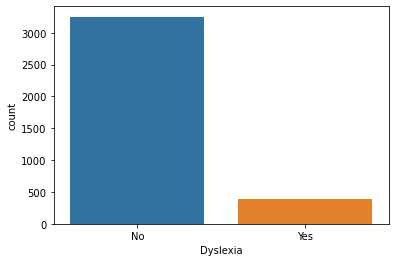

In [57]:
y = dataset["Dyslexia"]

sns.countplot(y)


dyslexia_temp = dataset.Dyslexia.value_counts()

print(dyslexia_temp)

In [62]:
#determine cardinality of Gender
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<AxesSubplot:xlabel='Gender', ylabel='count'>

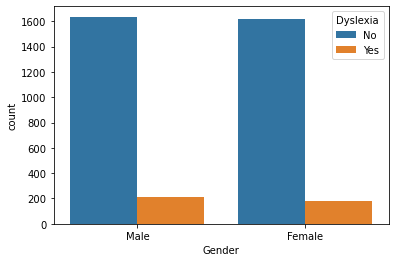

In [63]:
# visualizing relationship between dyslexia and gender
sns.countplot(data=dataset, x='Gender', hue='Dyslexia')

In [61]:
# determine cardinality of Nativelang
dataset['Nativelang'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='Nativelang', ylabel='count'>

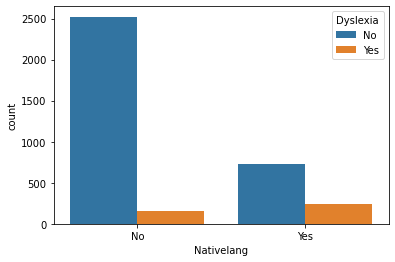

In [64]:
# visualizing relationship between dyslexia and Nativelang
sns.countplot(data=dataset, x='Nativelang', hue='Dyslexia')

In [66]:
# determine cardinality of Otherlang
dataset['Otherlang'].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='Otherlang', ylabel='count'>

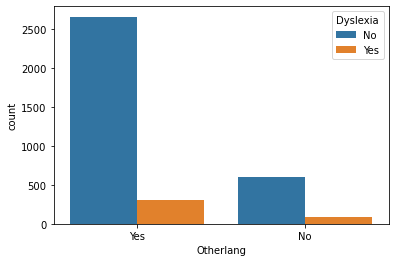

In [65]:
# visualizing relationship between dyslexia and gender
sns.countplot(data=dataset, x='Otherlang', hue='Dyslexia')

 ## Choosing Predictive Features and the Target Feature 

In [4]:
# choose the features for prediction
pred_features = dataset.iloc[:,:-1]     # all attributes except the last column

In [5]:
pred_features 

Gender Nativelang Otherlang  Age  Clicks1  Hits1  Misses1  Score1  \
0       Male         No       Yes    7       10     10        0      10   
1     Female        Yes       Yes   13       12     12        0      12   
2     Female         No       Yes    7        6      6        0       6   
3     Female         No       Yes    7        0      0        0       0   
4     Female         No       Yes    8        4      4        0       4   
...      ...        ...       ...  ...      ...    ...      ...     ...   
3639    Male         No        No   10        7      7        0       7   
3640  Female         No       Yes   15        9      9        0       9   
3641  Female         No       Yes   15       11     11        0      11   
3642  Female         No       Yes   15       10     10        0      10   
3643  Female         No       Yes   15       13     13        0      13   

      Accuracy1  Missrate1  
0           1.0        0.0  
1           1.0        0.0  
2           1.0        0.0  
3           0.0        0.0  
4           1.0        0.0  
...         ...        ...  
3639        1.0        0.0  
3640        1.0        0.0  
3641        1.0        0.0  
3642        1.0        0.0  
3643        1.0        0.0  

[3644 rows x 10 columns]

In [6]:
# choose the target feature 
target_feature = dataset.iloc[:,10]    # last column in the data

In [7]:
target_feature

0        No
1       Yes
2        No
3        No
4        No
       ... 
3639    Yes
3640     No
3641     No
3642     No
3643     No
Name: Dyslexia, Length: 3644, dtype: object

## Pre-Processing the Data

In [8]:
# transfrom categorical features to numeric features using LabelEncoder
from sklearn.preprocessing import LabelEncoder 

In [9]:
LabelEncoder_pred_features = LabelEncoder()

In [10]:
pred_features = pred_features.apply(LabelEncoder().fit_transform)

In [11]:
pred_features

Gender  Nativelang  Otherlang  Age  Clicks1  Hits1  Misses1  Score1  \
0          1           0          1    0       10     10        0      10   
1          0           1          1    6       12     12        0      12   
2          0           0          1    0        6      6        0       6   
3          0           0          1    0        0      0        0       0   
4          0           0          1    1        4      4        0       4   
...      ...         ...        ...  ...      ...    ...      ...     ...   
3639       1           0          0    3        7      7        0       7   
3640       0           0          1    8        9      9        0       9   
3641       0           0          1    8       11     11        0      11   
3642       0           0          1    8       10     10        0      10   
3643       0           0          1    8       13     13        0      13   

      Accuracy1  Missrate1  
0            57          0  
1            57          0  
2            57          0  
3             0          0  
4            57          0  
...         ...        ...  
3639         57          0  
3640         57          0  
3641         57          0  
3642         57          0  
3643         57          0  

[3644 rows x 10 columns]

In [67]:
# drop hits1, misses1 and score from the data as they are used to obtain the accuracy and the misrate respectively
pred_features= pred_features.drop(['Hits1', 'Misses1'], axis=1)

In [68]:
pred_features

Gender  Nativelang  Otherlang  Age  Clicks1  Score1  Accuracy1  \
0          1           0          1    0       10      10         57   
1          0           1          1    6       12      12         57   
2          0           0          1    0        6       6         57   
3          0           0          1    0        0       0          0   
4          0           0          1    1        4       4         57   
...      ...         ...        ...  ...      ...     ...        ...   
3639       1           0          0    3        7       7         57   
3640       0           0          1    8        9       9         57   
3641       0           0          1    8       11      11         57   
3642       0           0          1    8       10      10         57   
3643       0           0          1    8       13      13         57   

      Missrate1  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
3639          0  
3640          0  
3641          0  
3642          0  
3643          0  

[3644 rows x 8 columns]

## Spliting the Data,  for  Training and Testing the Model

In [69]:
#split data for training and testing
X_train,X_test,Y_train, Y_test = train_test_split(pred_features, target_feature, test_size=0.3, random_state=0)

In [70]:
dec_classifier =DecisionTreeClassifier()
dec_classifier.fit(X_train, Y_train)


DecisionTreeClassifier()

## Checking for Accuracy

In [71]:
# checking for accuracy
accuracy = dec_classifier.score(X_test, Y_test)
accuracy

0.8272394881170019

In [72]:
# show the decion marking tree
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

## Pictorial View of the Decision Tree

In [73]:
dot_data = StringIO()

In [74]:
export_graphviz(dec_classifier, out_file = dot_data, filled = True, rounded = True, special_characters = True)

In [75]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [76]:
# create tree and save in directory
graph.write_png('tree.png')

True

In [77]:
#show tree
Image(graph.create_png())

## The Trained Model

In [54]:
# saving the trained model as dyslexia_predictor

import joblib
joblib.dump(dec_classifier, 'dyslexia_predictor.joblib')

['dyslexia_predictor.joblib']